### Clustering Analysis after PCA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df=pd.read_csv('marketing.csv')

In [3]:
creditcard_df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


* Cust_ID: Identification of credit card holder
* Balance: Balance amount left in customer account to make purchases.
* Balance_Frequency: How frequently balance is updated i.e score between 0 to 1(1-frequently updated  0-not frequently updated)
* Purchases: Amount of purchases made from account
* ONEOFF_Purchases : Maximum purchase amount done in One-go
* Installment_purchases : Amount of Purchases done in installments
* Cash_Advance : cash in advance given by user.
* PURCHASES_FREQUENCY: How frequently the purchases are made score between 0 to 1
* ONEOFF_PURCHASES_FREQUENCY: How frequently the purchases are made on one-go
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently the purchases are made on installments.
* CASH_ADVANCE_FREQUENCY:How frequently the cash in advance are paid.
* CASH_ADVANCE_TRX: Numer of transaction made with cash advance
* PURCHASES_TRX: Number of purchase transaction made
* Credit_Limit: Limit of Credit card for user
* PAYMENTS: Amount of payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payment done by user.
* PRC_FULL_PAYMENT: Percent of full payment done by user
* Tenure : Tenure of credit-card service for user

In [4]:
creditcard_df.shape

(8950, 18)

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From above table we can see that
* Mean banlace of all customer is 1564
* Most all customer update their balance at rate of 0.87
* Average purchase is 1000
* Average amount of purchases in one go is 592
* Average purchase frequency is around 0.5
* Averaage credit limit is around 4500
* Percentage of full payment is 15%
* Average tenure is 11-12 years

and many more we can check to learn

# PCA

In [42]:
#Obtaining the preinciple component analysis
pca=PCA(n_components=2)
principle_comp = pca.fit_transform(creditcard_df_scaled)
principle_comp

array([[-1.68222004, -1.0764484 ],
       [-1.13828924,  2.50648249],
       [ 0.96968507, -0.38353061],
       ...,
       [-0.92620627, -1.81078436],
       [-2.33655543, -0.65796233],
       [-0.55642334, -0.40047164]])

In [43]:
# Lets create datafram of above matrix
pca_df = pd.DataFrame(data=principle_comp,columns=['PCA1','PCA2'])

In [44]:
pca_df.head(10)

,PCA1,PCA2
0,-1.682220,-1.076448
1,-1.138289,2.506482
2,0.969685,-0.383531
3,-0.873626,0.043170
4,-1.599435,-0.688580
5,0.251296,-0.780074
6,6.352918,-0.692526
7,0.277104,-1.290731
8,-0.441746,-0.461837
9,-0.562513,-0.366340


In [51]:
# Lets concatenate our clusters to this dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682220,-1.076448,3
1,-1.138289,2.506482,2
2,0.969685,-0.383531,4
3,-0.873626,0.043170,3
4,-1.599435,-0.688580,3


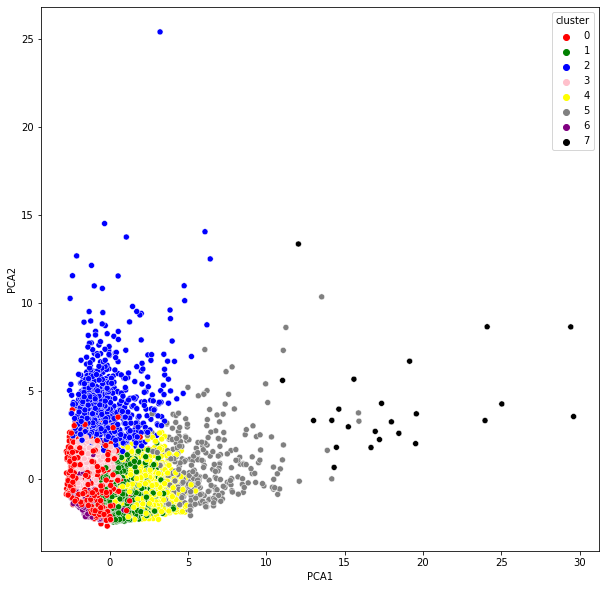

In [53]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x="PCA1",y="PCA2",hue='cluster',data=pca_df,palette=['red','green','blue','pink','yellow','grey','purple','black'])
plt.show()